1.6332222222222221
0.5668888888888889
3           DCC01
6           DCC02
5           DCC03
7         KAIST01
2         KAIST02
1         KAIST03
8     Riverside01
4     Riverside02
0     Riverside03
Name: sequence, dtype: object
3                              2.276/0.531
6                                1.5/0.454
5                              1.481/0.477
7    1.5830000000000002/0.6579999999999999
2                              1.594/0.645
1                              1.744/0.777
8                              1.585/0.627
4                 1.4269999999999998/0.512
0                              1.509/0.421
Name: for_copy, dtype: object
0.06533333333333334
8.444555555555556
['0.083/7.466' '0.051/6.135' '0.057/4.895' '0.071/6.692' '0.067/6.1'
 '0.07/11.581' '0.071/5.7570000000000014' '0.064/7.479'
 '0.054000000000000006/19.896']


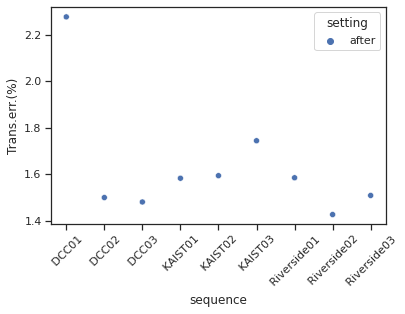

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math



sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")
colors = ["#E59866", "#D35400", "#873600", "#85C1E9", "#3498DB", "#2874A6"]
pal=sns.color_palette(colors)


mar=['o','o','o','s','s','s']
lin=['-','--',':','-','--',':']


df = pd.read_csv('./2021-08-04_23:19_eval.csv', sep=r',', header=0)
df['setting'] = df.apply (lambda row: "after", axis=1)
df['for_copy'] = df.apply (lambda row: str(row["Trans.err.(%)"])+"/"+str(row["Rot.err.(deg/100m)"]), axis=1)
df['for_copy_ATE'] = df.apply (lambda row: str(row["RPE(m)"])+"/"+str(row["ATE(m)"]), axis=1)
#print(df.columns)
df = df.rename(columns={'resolution r': 'resolution r [m]'})
#from natsort import index_natsorted, order_by_index
df=df.sort_values('sequence', ascending=True)
sns.scatterplot(data=df, x="sequence", y="Trans.err.(%)", hue="setting")
plt.xticks(rotation=45)
print(df["Trans.err.(%)"].mean())
print(df["Rot.err.(deg/100m)"].mean())
print(df["sequence"])
print(df["for_copy"])
print(df["RPE(m)"].mean())
print(df["ATE(m)"].mean())
print(df["for_copy_ATE"].values)
#print(df["Rot.err.(deg/100m)"])



## import math

### LOAD AND SORT NAMES OF COLUMNS
dd = pd.read_csv('./Mulran_generalization_2021-07-24_12:35_errors.txt', sep=r' ', header=0)
print(dd)
print(dd["Rot.err.(deg/100m)"])
dd = dd.rename(columns={'length': 'Path length',})
dd = dd.rename(columns={'Rot.err.(deg/100m)': 'Rotation error (deg/100m)',})
dd = dd.rename(columns={'Trans.err.(%)': 'Translation errror (%) [m/m]',})
#df['Rot.err.(deg/100m)'] = df['Rot.err.(deg/100m)'].apply(lambda x: x*180.0/math.pi*100)
dd['Rotation error (deg/100m)'] = dd['Rotation error (deg/100m)']*180/math.pi*100
dd['Translation errror (%) [m/m]'] = dd['Translation errror (%) [m/m]']*100

ax1=sns.lineplot(data=dd, x="Path length", y="Rotation error (deg/100m)", color='red',label = 'Rotation error (deg/100m)', legend=False)
#plt.legend(loc='upper center')
#sns_plot.tick_params(axis='y', labelcolor='red')
#sns_plot = sns.pointplot(x="Path length", y="Rot.err.(deg/100m)", data=dd, legend_out=False,palette=sns.color_palette(["#FF0000"]),linestyles=["-", "--"])
ax2 = ax1.twinx()
sns.lineplot(data=dd, x="Path length", y="Translation errror (%) [m/m]", color='blue',label = 'Translation errror (%) [m/m]',legend=False,ax=ax2)
#ax2.tick_params(axis='y', labelcolor='blue')
ax1.figure.legend(loc='upper center',bbox_to_anchor=(0.65, 0.85))
ax2.figure.legend(loc='upper center',bbox_to_anchor=(0.65, 0.85))
#plt.legend(loc='upper right')
#p=[ax1, ax2]
#sns_plot.legend(p, [p_.get_label() for p_ in p],
#loc= 'center', fontsize= 'small')


#sns_plot = sns.pointplot(x="Path length", y="Trans.err.(%)", kind="box", dodge=True, data=dd, legend_out=False, par=p)
#sns_plot.legend(loc='upper right', ncol=1)
plt.title('Error vs path distance')
plt.xlim(100,800)
plt.grid()
plt.show()
ax1.figure.savefig('demo-file.pdf')

#ax1.savefig('./output/Transl_error_submap_keyframes.eps', format='eps')
#ax1.savefig('./output/Transl_error_submap_keyframes.png', format='png', dpi=1500)



